# 04 - Distribuição Normal e Teorema Central do Limite

Nessa aula, iremos tratar dos seguintes conteúdos:
- Distribuição Normal
- Teorema Central do Limite

<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>

## Distribuição Normal

A distribuição normal é uma das distribuições mais conhecidas da estatística/probabilidade! Ela é representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

<br><br>

### Definição Matemática

A Variável aleatória contínua $X$ que tome todos os valores na reta real $-\infty < X < \infty$ segue uma distribuição normal (ou Gaussiana) se sua função de densidade de probabilidade é dada por:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}} $$

Onde respectivamente temos como __valor esperado__ e __variância__ da distribuição normal:

- __Valor esperado:__ $E[X] = \mu$

- __Variância:__ $V[X] = \sigma^2$


<br>

Usualmente aplicamos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de valor esperado/média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>


Em uma distribuição normal a média, mediana e moda dos dados possuem o mesmo valor.

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">


Vamos ver algumas formas de gerarmos valores de acordo com uma distribuição Normal:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
media = 70
variancia = 2

In [ ]:
desvio_padrao = np.sqrt(variancia)

rv = stats.norm(media, desvio_padrao)

print('P(X = 69) = ', rv.pdf(69))
print('P(X = 70) = ', rv.pdf(70))
print('P(X = 71) = ', rv.pdf(71))

P(X = 69) =  0.21969564473386122
P(X = 70) =  0.28209479177387814
P(X = 71) =  0.21969564473386122


In [ ]:
np.sqrt(2)

1.4142135623730951

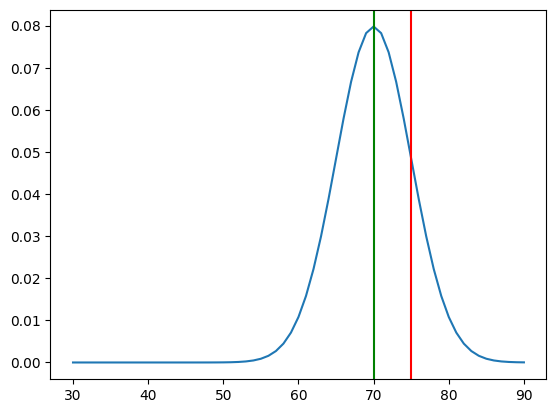

In [ ]:
desvio_padrao = 5

x = range(30, 91)
y = stats.norm(media, desvio_padrao).pdf(x)

plt.plot(x, y)
plt.axvline(70, color='green')
plt.axvline(75, color='red')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df_tips = sns.load_dataset('tips')

In [ ]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

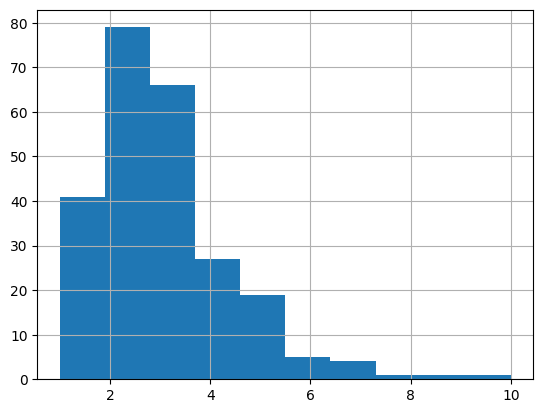

In [ ]:
df_tips['tip'].hist()

<Axes: >

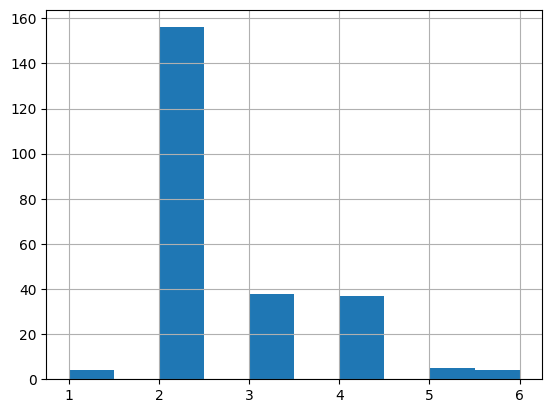

In [ ]:
df_tips['size'].hist()

<Axes: >

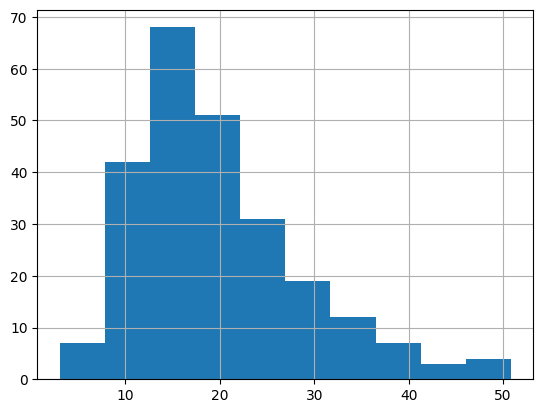

In [ ]:
df_tips['total_bill'].hist()

## Normalização ou Z-Score
<br>

Imagine ter que calcular a probabilidade de uma distribuição normal de um determinado evento, utilizando a função de densidade de probabilidade. Seria bastante trabalho e nem um pouco usual!

Para isso então que existe uma relação conhecida como normalização ou __Z-Score__, onde este parâmetro nada mais é que __o número de desvios padrões que a observação está com relação à média__:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$


<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>
<br>

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers. Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

<br>

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**



onde o objetivo é convertermos os dados para uma distribuição normal na forma X ~ N($\mu$, $\sigma^2$)

**Exemplo**:

Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

$$\mu=165$$
$$\sigmaˆ{2}=9$$
$$P(X < 163) => z = \frac{162 - 165}{3}$$
$$P(X < 163) => z = -1$$
$$P(X < 163) = 0.1586$$


In [ ]:
import numpy as np


x = 162
media = 165
desvio_padrao = np.sqrt(9)

z = (x - media) / desvio_padrao

print('Probabilidade é:', stats.norm.cdf(z))

Probabilidade é: 0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

Obs.: Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:

$$ P(X > 13) = 1 - P( X \leq 13) $$

**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

a) entre 60 e 77,5 Kg.

$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) =
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$


b) mais do que 92,5 Kg.
$$
P(X \geq 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

Uma forma mais tradicional também para calcular a probabilidade a partir de uma distribuição normal seria justamente utilizar de valores tabelados para o __Z-Score__:

<img src = "https://media.cheggcdn.com/media/70e/70ea2b20-f693-43d1-aa34-33289a97d606/phpqH8k6j" width = 800>

In [ ]:
media = df_tips['total_bill'].mean()
desvio_padrao = df_tips['total_bill'].std()

rv = stats.norm(media, desvio_padrao)

# df_tips['total_bill_z'] = df_tips['total_bill'].apply(lambda x: (x - media)/desvio_padrao)
df_tips['total_bill_z'] = (df_tips['total_bill'] - media) / desvio_padrao
df_tips['total_bill_prob'] = rv.pdf(df_tips['total_bill_z'])
# df_tips = df_tips.assign(total_bill_z = lambda x: (x.total_bill - media)/desvio_padrao)

# df_tips.drop(columns='total_bill_z', inplace=True)

array([[<Axes: title={'center': 'total_bill_z'}>]], dtype=object)

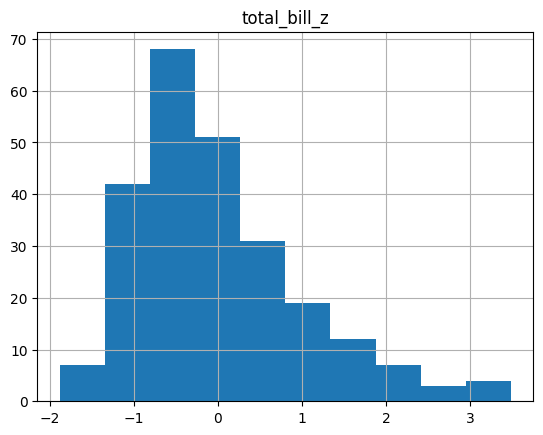

In [ ]:
df_tips[['total_bill_z']].hist()

In [ ]:
# Calcular a probabilidade da minha próxima receita ser maior do que 16.99
receita_maior = 16.99

display(df_tips[['total_bill', 'total_bill_prob']].head(3))
print('P(X > 16.99) = ', df_tips[df_tips['total_bill'] > receita_maior]['total_bill_prob'].sum())

,total_bill,total_bill_prob
0,16.99,0.003503
1,10.34,0.002888
2,21.01,0.003923


P(X > 16.99) =  0.596937452162548


In [ ]:
media = df_tips['total_bill'].mean()
desvio_padrao = df_tips['total_bill'].std()

(16.99 - media) / desvio_padrao

-0.31406574275923616

In [ ]:
media = df_tips['total_bill'].mean()
desvio_padrao = df_tips['total_bill'].std()


z = (receita_maior - media)/desvio_padrao

stats.norm(media, desvio_padrao).pdf(z)

0.0035030285699103585

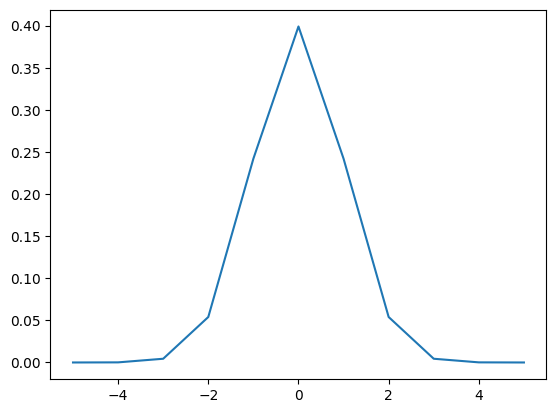

In [ ]:
# Distribuição teorica
media = df_tips['total_bill_z'].mean()
desvio_padrao = df_tips['total_bill_z'].std()

rv = stats.norm(media, desvio_padrao)

x = range(-5, 6)
y = rv.pdf(x)

plt.plot(x, y)
plt.show()

<Axes: >

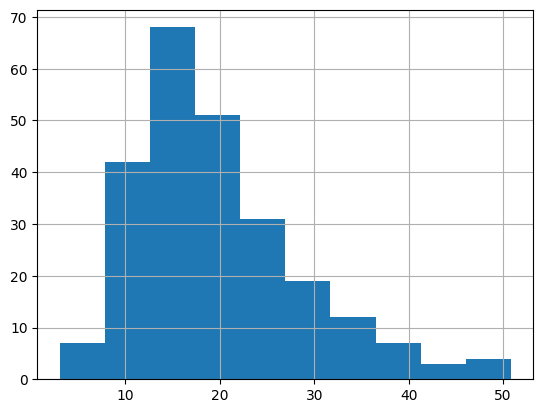

In [ ]:
df_tips['total_bill'].hist()

In [ ]:
# Voltar o z-score para o x anterior
# z = (x - media) / desvio_padrao
# z * desvio_padrao = x - media
# x = z * desvio_padrao + media

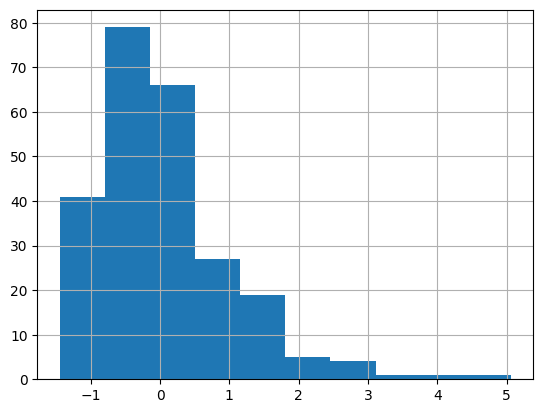

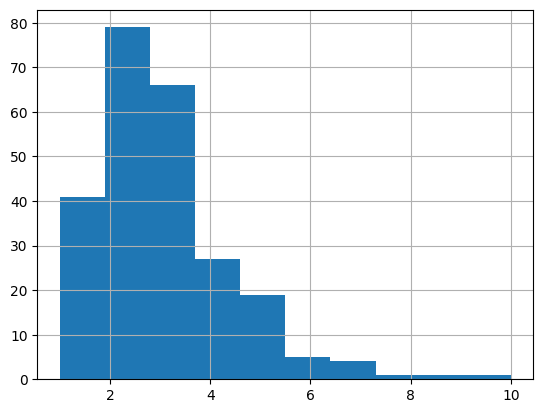

In [ ]:
media = df_tips['tip'].mean()
desvio_padrao = df_tips['tip'].std()

rv = stats.norm(media, desvio_padrao)

# df_tips['tip_z'] = df_tips['tip'].apply(lambda x: (x - media)/desvio_padrao)
df_tips['tip_z'] = (df_tips['tip'] - media) / desvio_padrao
df_tips['tip_prob'] = rv.pdf(df_tips['tip_z'])
# df_tips = df_tips.assign(tip_z = lambda x: (x.tip - media)/desvio_padrao)
# df_tips.drop(columns='tip_z', inplace=True)

df_tips['tip_z'].hist()
plt.show()
df_tips['tip'].hist()
plt.show()

In [ ]:
df_tips.describe()

,total_bill,tip,size,total_bill_z,total_bill_prob,tip_z,tip_prob
count,244.000000,244.000000,244.000000,2.440000e+02,244.000000,2.440000e+02,244.000000
mean,19.785943,2.998279,2.569672,-6.028875e-17,0.003889,2.839259e-16,0.045743
std,8.902412,1.383638,0.951100,1.000000e+00,0.001077,1.000000e+00,0.060565
min,3.070000,1.000000,1.000000,-1.877687e+00,0.002320,-1.444221e+00,0.001665
25%,13.347500,2.000000,2.000000,-7.232245e-01,0.003154,-7.214882e-01,0.007771
50%,17.795000,2.900000,2.000000,-2.236408e-01,0.003584,-7.102918e-02,0.024629
75%,24.127500,3.562500,3.000000,4.876833e-01,0.004276,4.077810e-01,0.049980
max,50.810000,10.000000,6.000000,3.484905e+00,0.008382,5.060370e+00,0.281575


## Teorema Central do Limite

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**.

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal.

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, como:


Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e desvio padrão $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande ($n > 30$), de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Teorema_central_do_limite.svg/1920px-Teorema_central_do_limite.svg.png)

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

## Exercícios

**1)** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

__2)__ O tempo para desenvolver um servidor web em uma empresa é descrito por uma variável aleatória X, medida em dias, com distribuição normal de média $\mu$ = 45 e variância $\sigma^2$ = 400. Calcule a probabilidade de que um novo servidor web será finalizado entre 30 e 40 dias.

__3)__ Uma população é descrita pela seguinte distribuição de probabilidades:
    
- 𝑃(𝑋 = 2) = 0,2;
- 𝑃(𝑋 = 4) = 0,4;
- 𝑃(𝑋 = 6) = 0,4

Uma amostra com 50 observações é sorteada. Calcule a probabilidade de que a média dessa amostra seja maior do que 4.5

__4)__ Em uma empresa de vendas planos de internet, a duração de conversas telefônicas (em minutos), segue o modelo de uma distribuição exponencial com parâmetro $\lambda = \frac{1}{5}$. Observando-se uma amostra aleatória de 50 dessas chamadas, qual será a probabilidade de que tais amostras em média não ultrapassem 6 minutos?